In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [15]:
df = pd.read_csv("monthly-milk-production-pounds-p.csv")

In [16]:
df.columns

Index(['Month', 'value'], dtype='object')

In [17]:
print(df.head(), '\nindex type:\n', type(df.index))
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
# 索引并resample为月
indexed_df = df.set_index('Month')
ts = indexed_df['value']



     Month  value
0  1962-01    589
1  1962-02    561
2  1962-03    640
3  1962-04    656
4  1962-05    727 
index type:
 <class 'pandas.core.indexes.range.RangeIndex'>


In [18]:
ts = ts.resample('M').sum()

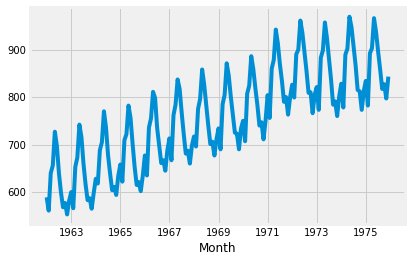

In [20]:
ts.plot()

In [4]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [21]:
y = ts

In [22]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2692.5389822312172
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2328.210196081579
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1443.9444260476184
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1305.3386049260569
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1340.0277737960891
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1334.413560850871
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1299.9128017700104
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1241.4893843261032
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2467.380878228925
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2120.253292205112
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1298.1255645574147
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1189.1245489150779
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1232.1197581937288
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1215.8037457863466
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1204.6588818319874
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1135.6410375390396
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1739.8839094674686
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1475.6535365320